In [1]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import pschitt.vizualisation as viz
from importlib import reload
import math

In [2]:
%matplotlib inline

In [45]:
shower = sky.shower()

shower.impact_point = np.array([400,200,0])

#shower direction
shower.alt = math.radians(70)
shower.az = math.radians(90)

#pointing direction off-axis
talt = math.radians(71)
taz = math.radians(89)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [46]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [47]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal)
tel2 = geo.Telescope([-200,200,0],tel_normal)
tel3 = geo.Telescope([-200,-200,0],tel_normal)
tel4 = geo.Telescope([200,-200,0],tel_normal)
tel5 = geo.Telescope([0,0,0],tel_normal)
tel6 = geo.Telescope([1000,-500,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5, tel6]

In [48]:
# alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))

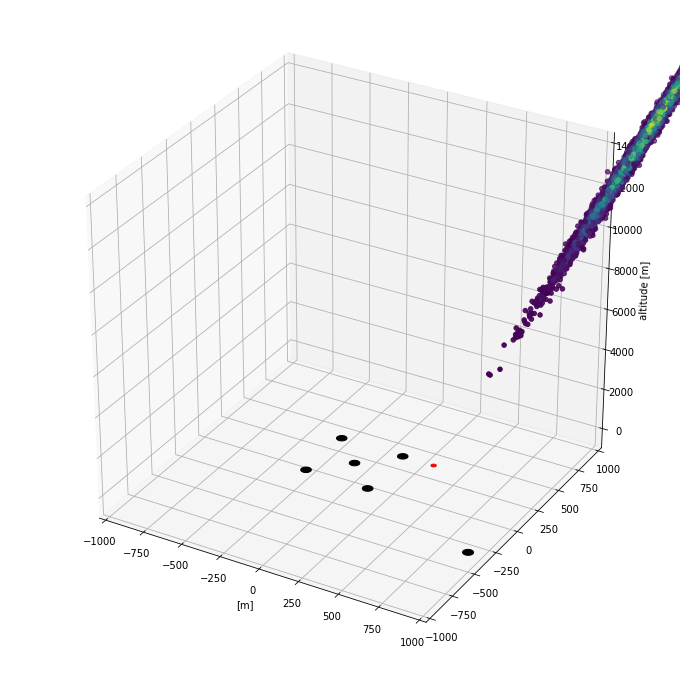

In [49]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig('../Images/ICRC2017/shower3D.eps', fmt='eps', dpi=300)

(669.7025943050617, 5319.308285711411, 1290.8958887670365, 14079.530415798026)

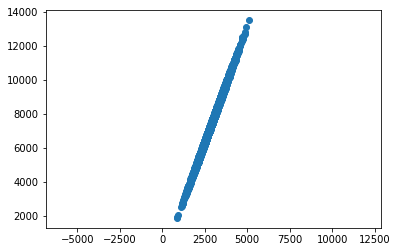

In [50]:
# projection
plt.scatter(shower.particles[:,1], shower.particles[:,2])
plt.axis('equal')

## Photosphere distribution along each axis

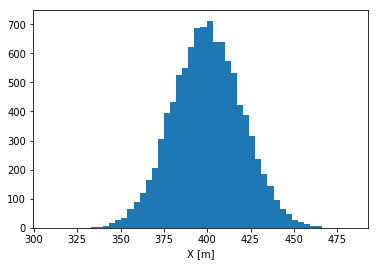

In [51]:
plt.hist(shower.particles[:,0], bins=50);
plt.xlabel("X [m]");

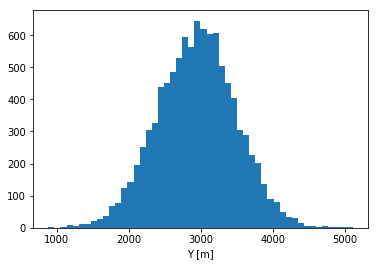

In [52]:
plt.hist(shower.particles[:,1], bins=50);
plt.xlabel("Y [m]");

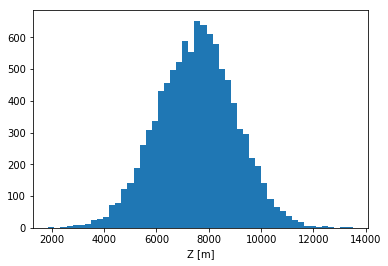

In [53]:
plt.hist(shower.particles[:,2], bins=50);
plt.xlabel("Z [m]");

## Site Map

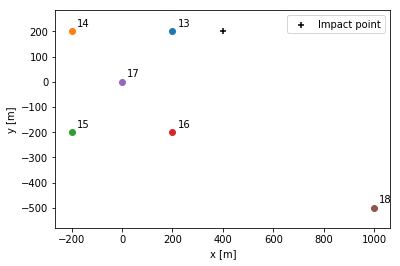

In [55]:
ax = viz.plot_array(alltel)
ax.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")
ax.legend()

## Producing images in telescopes

In [56]:
trigger_intensity = 20.
noise = 0

In [57]:
ci.array_shower_imaging(shower, alltel, noise)

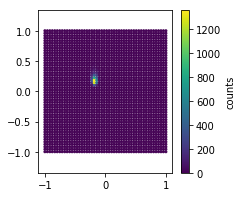

Signal sum = 7813.0


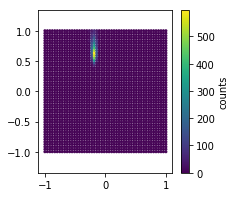

Signal sum = 7036.0


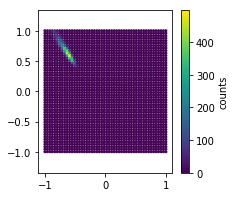

Signal sum = 7085.0


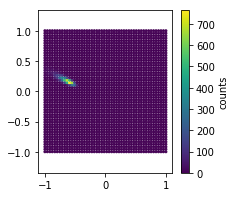

Signal sum = 7593.0


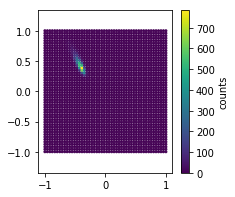

Signal sum = 7644.0


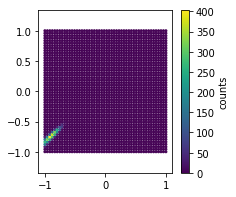

Signal sum = 4707.0


In [117]:
for tel in alltel:
    plt.figure(figsize=(3,3))
    viz.display_camera_image(tel, s=4);
    plt.show()
    print("Signal sum = {}".format(tel.signal_hist.sum()))

## Hillas reconstruction

In [86]:
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))


Number of triggered telescopes =  6


In [88]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

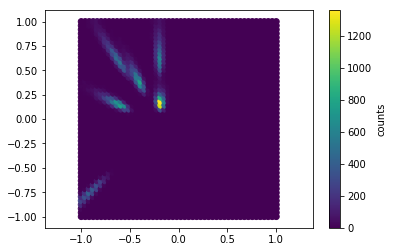

In [120]:
viz.display_stacked_cameras(alltel)

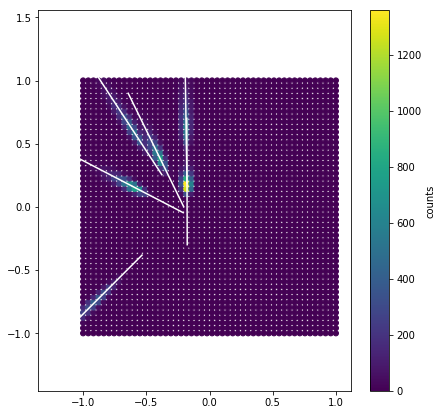

In [137]:
plt.figure(figsize=(7,7))
ax = viz.display_stacked_cameras(alltel, s=27)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    ax.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
# plt.savefig('../share/images/example/hillas_reco.eps', fmt='eps', dpi=300)

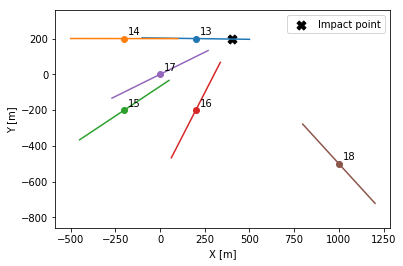

In [61]:
viz.plot_array_reconstructed(triggered_telescopes, HP, shower.impact_point)

In [62]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

In [63]:
if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [400 200   0]
Reconstruction with simple average = [384.48873938555226, 197.93466698229292, 0.0] 	Error = 15.65m
Reconstruction with ponderation and cut = [394.67418397440247, 197.78237395513233, 0.0] 	Error = 5.77m
